In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%pip install sweetviz
import sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 75.8 MB/s eta 0:00:00


In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [5]:
df_z_train = pd.read_csv('/content/drive/MyDrive/Ironhack/Proyecto4/dapt-sept2022/z_train.csv')

In [9]:
df_z_train.shape

(15326, 14)

In [7]:
df_z_test = pd.read_csv('/content/drive/MyDrive/Ironhack/Proyecto4/dapt-sept2022/z_test.csv')

In [10]:
df_z_test.shape

(3832, 13)

In [11]:
train_report = sweetviz.analyze(df_z_train)
test_report = sweetviz.analyze(df_z_test)

                                             |          | [  0%]   00:00 -> (? left)

                                             |          | [  0%]   00:00 -> (? left)


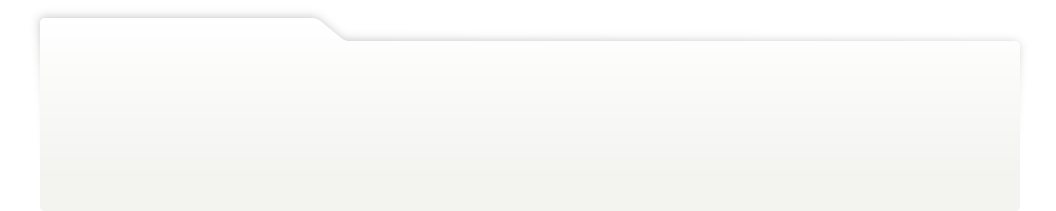
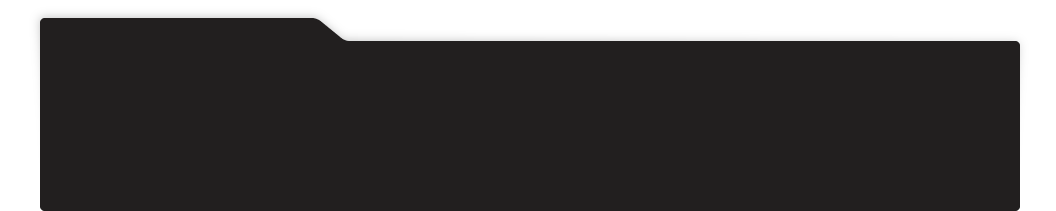
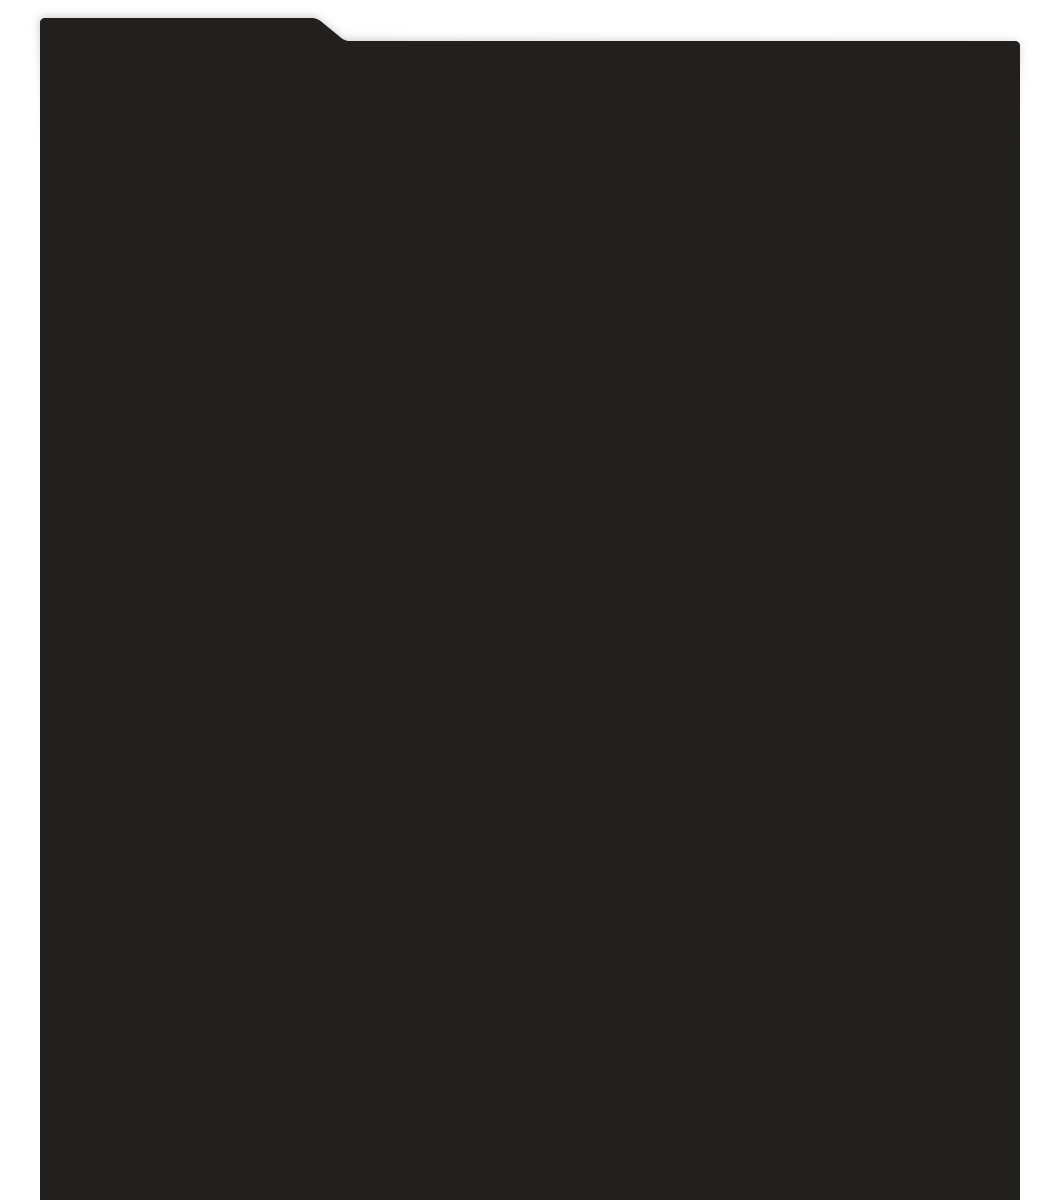
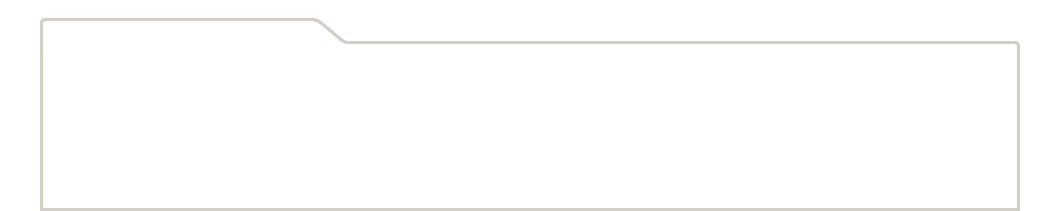
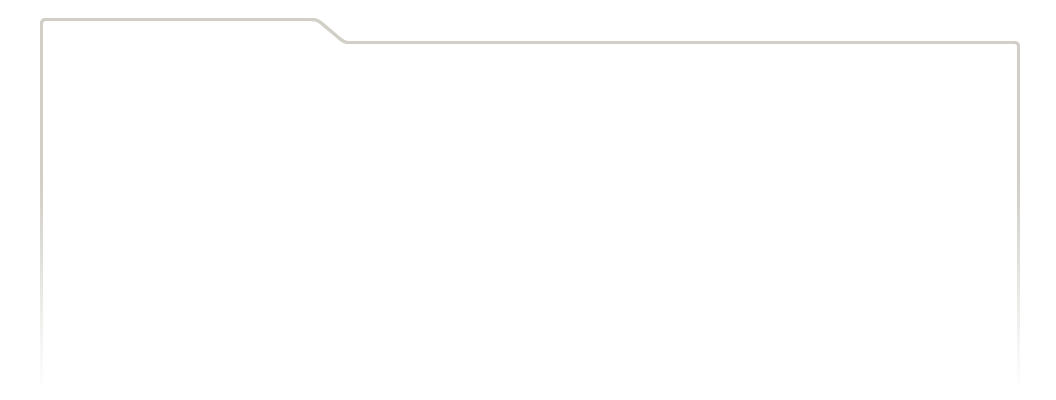
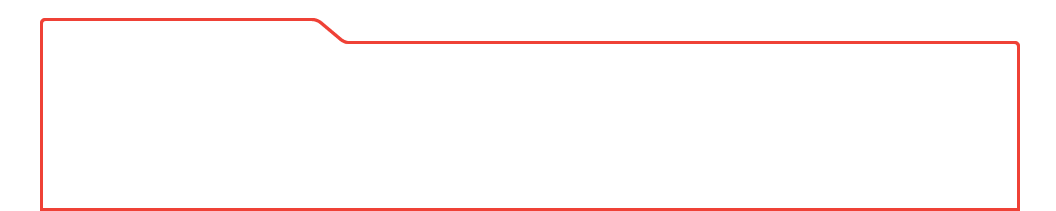
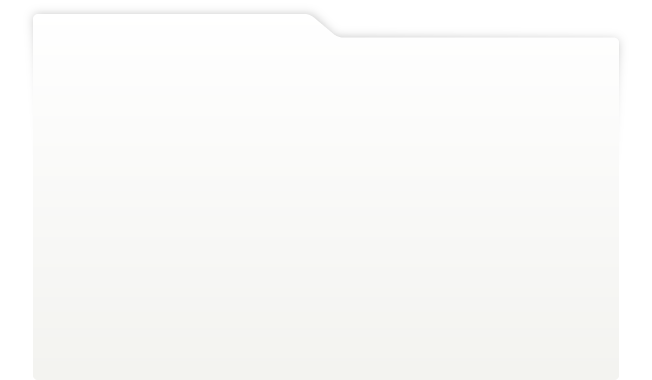
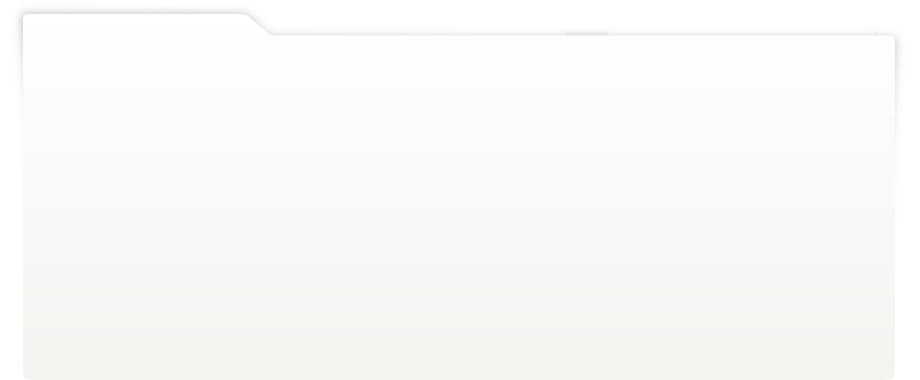
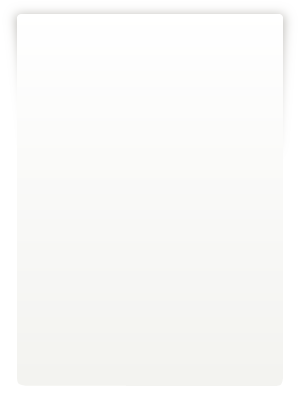
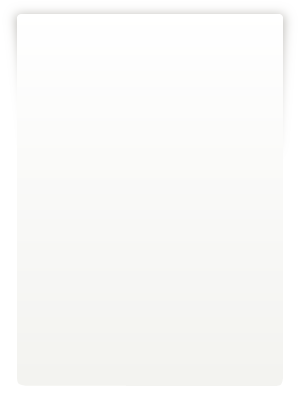
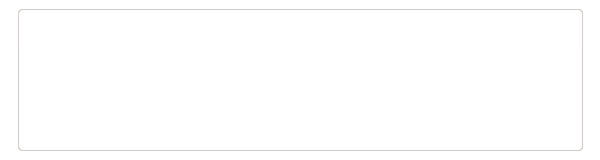
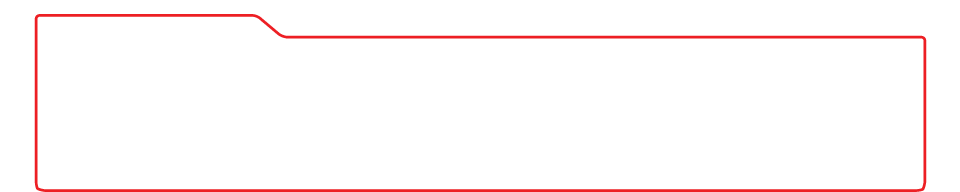
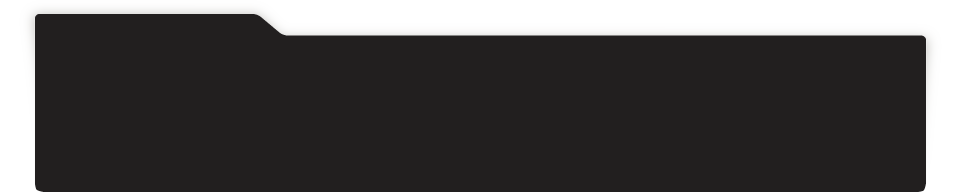
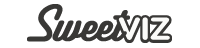
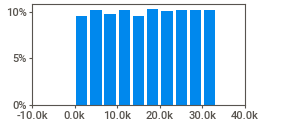
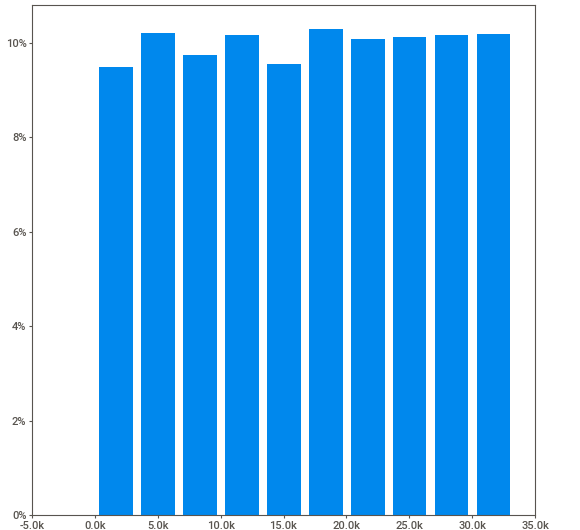
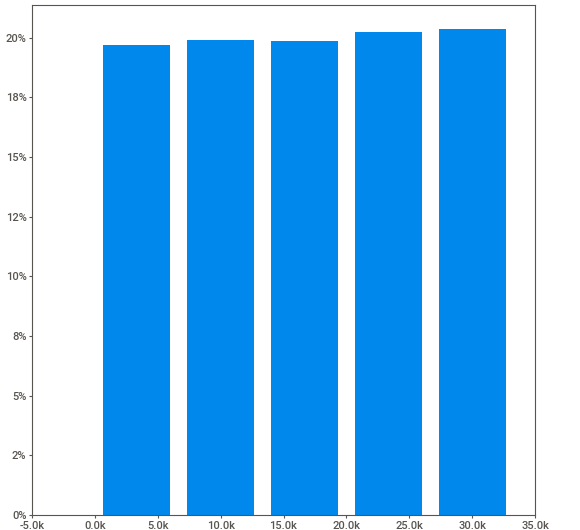
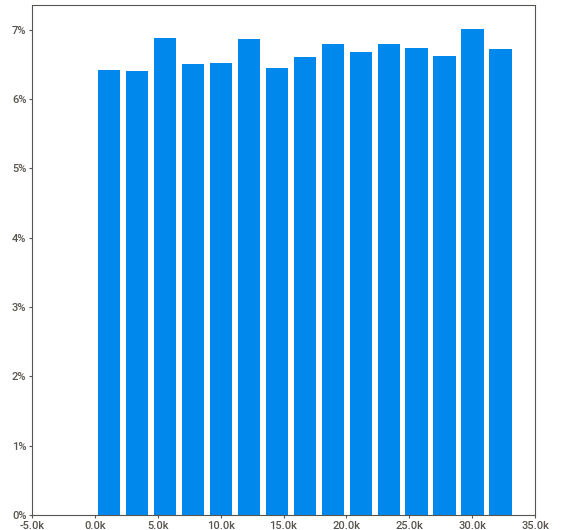
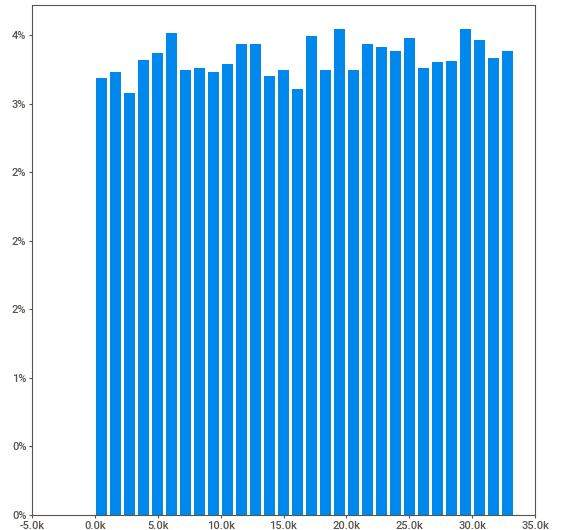
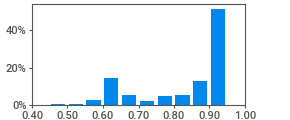
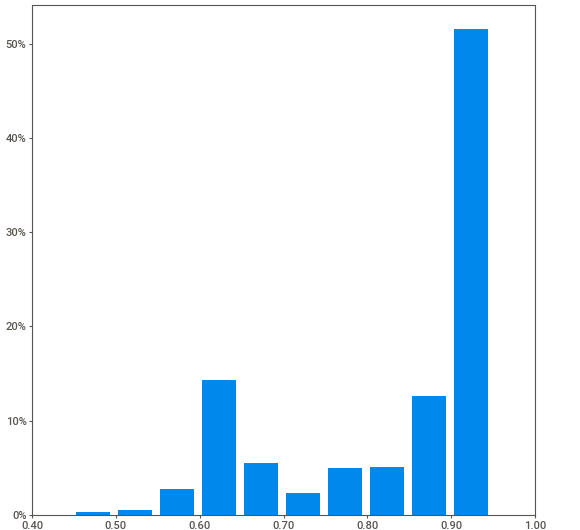
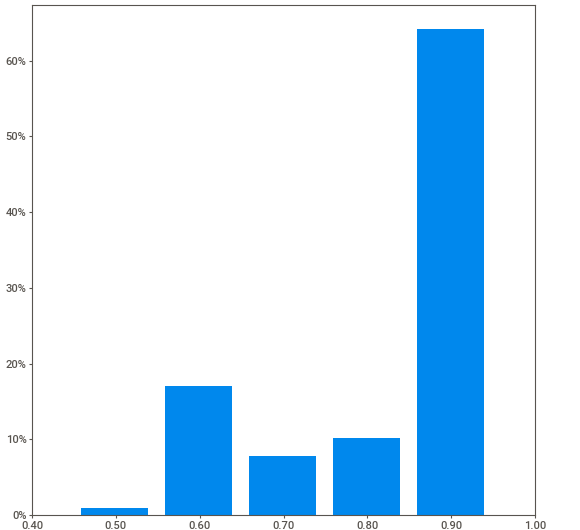
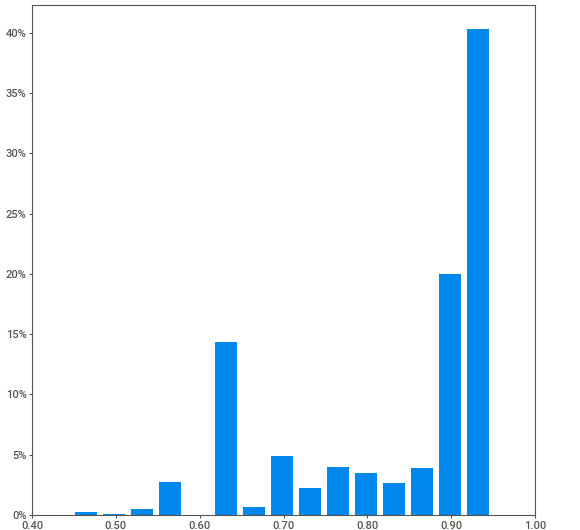
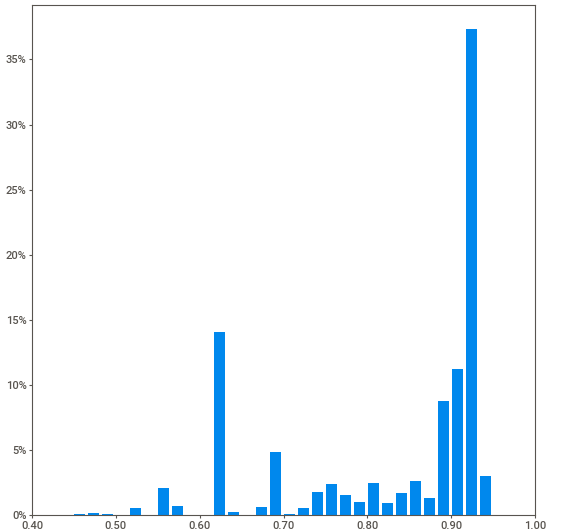
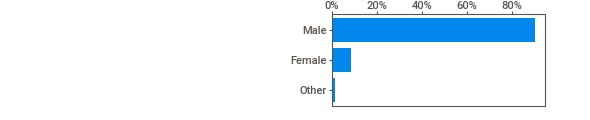
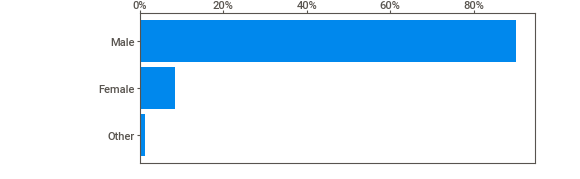
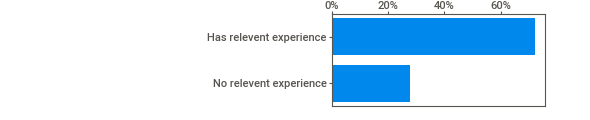
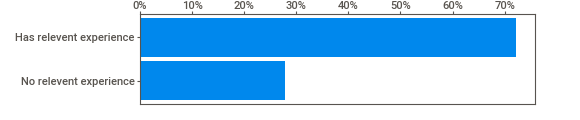
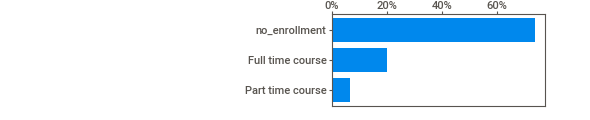
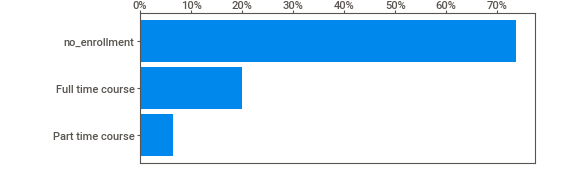
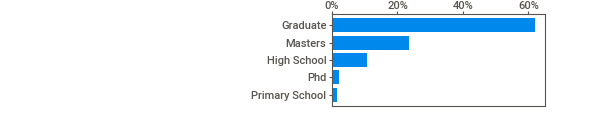
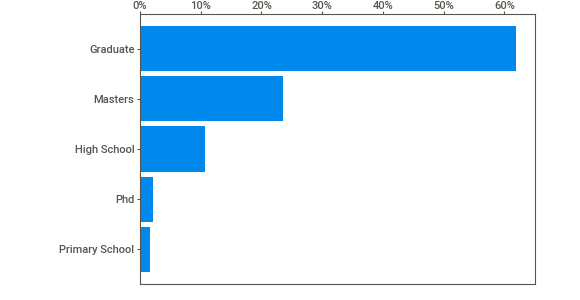
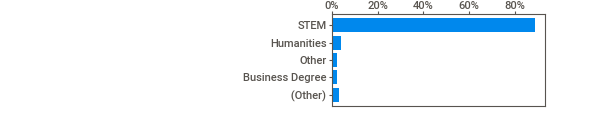
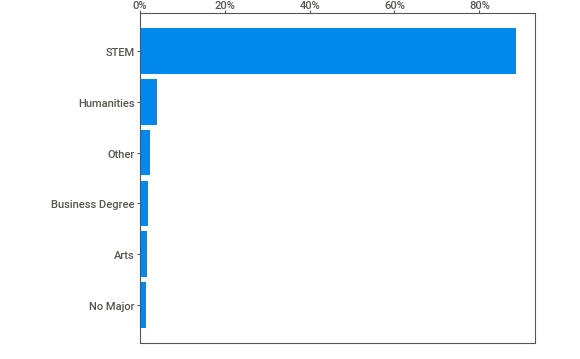
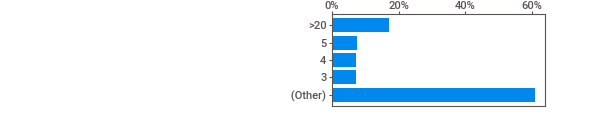
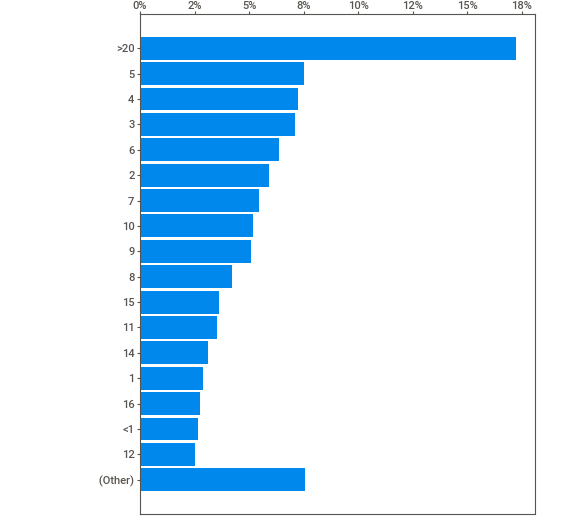
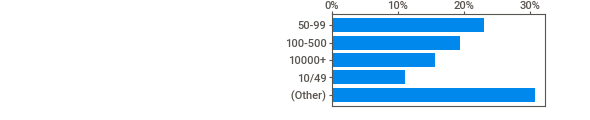
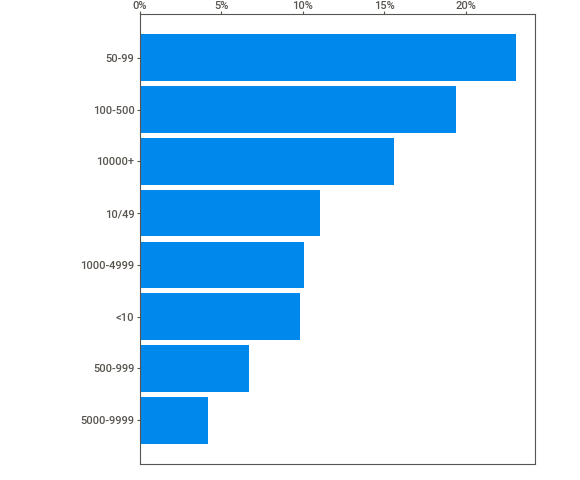
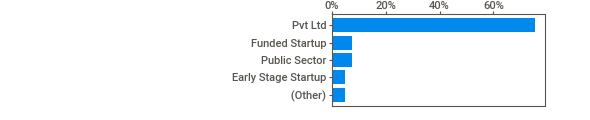
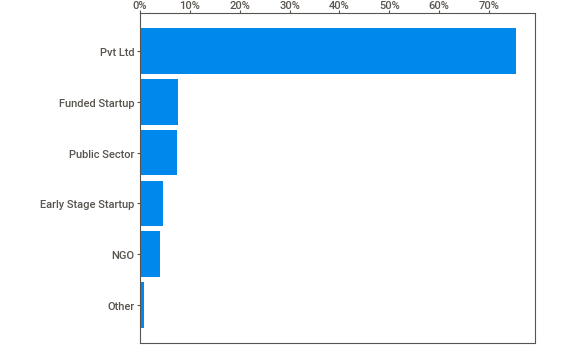
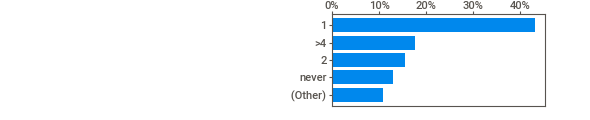
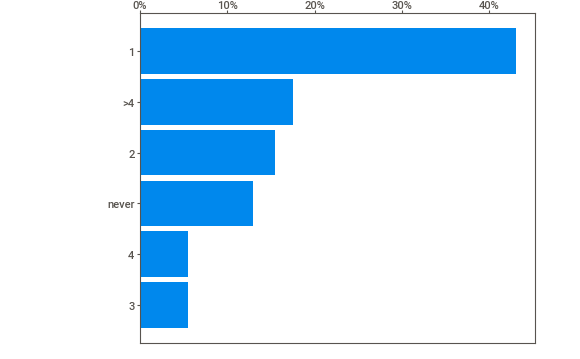
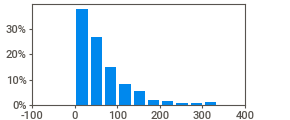
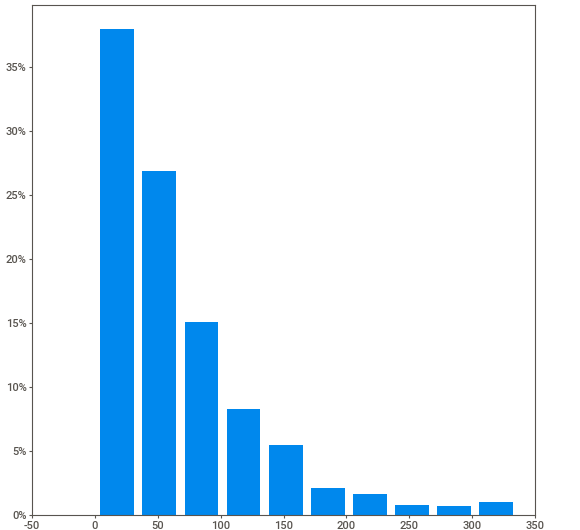
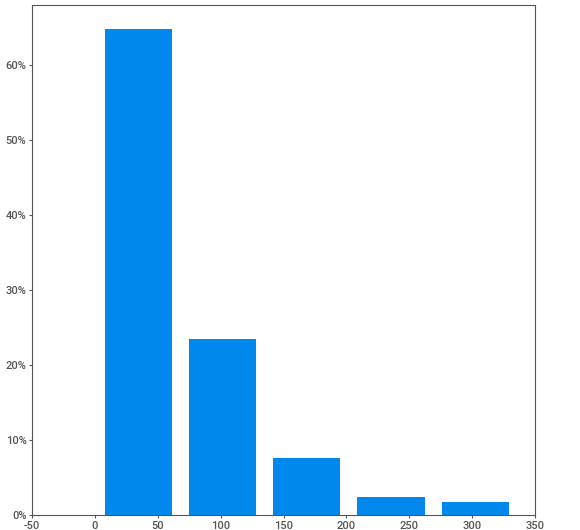
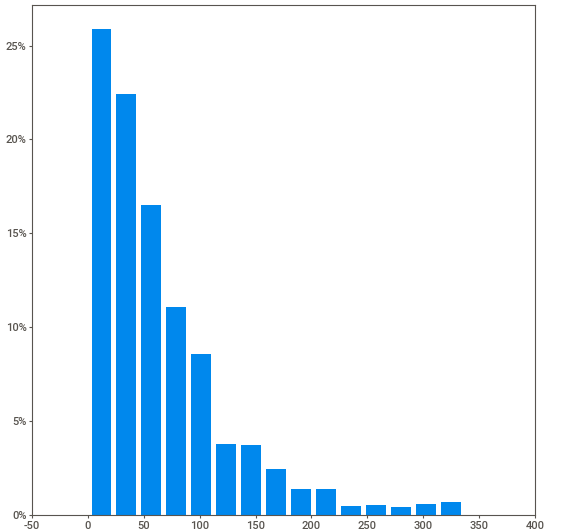
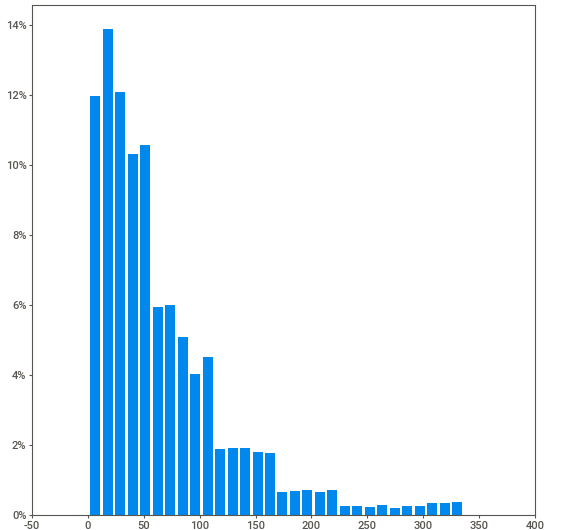
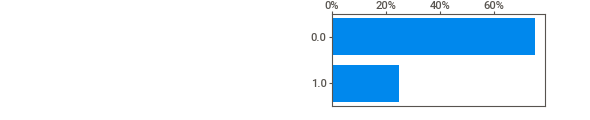
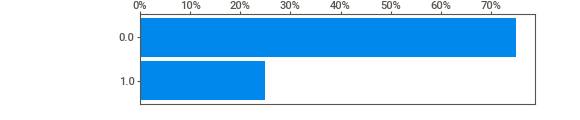
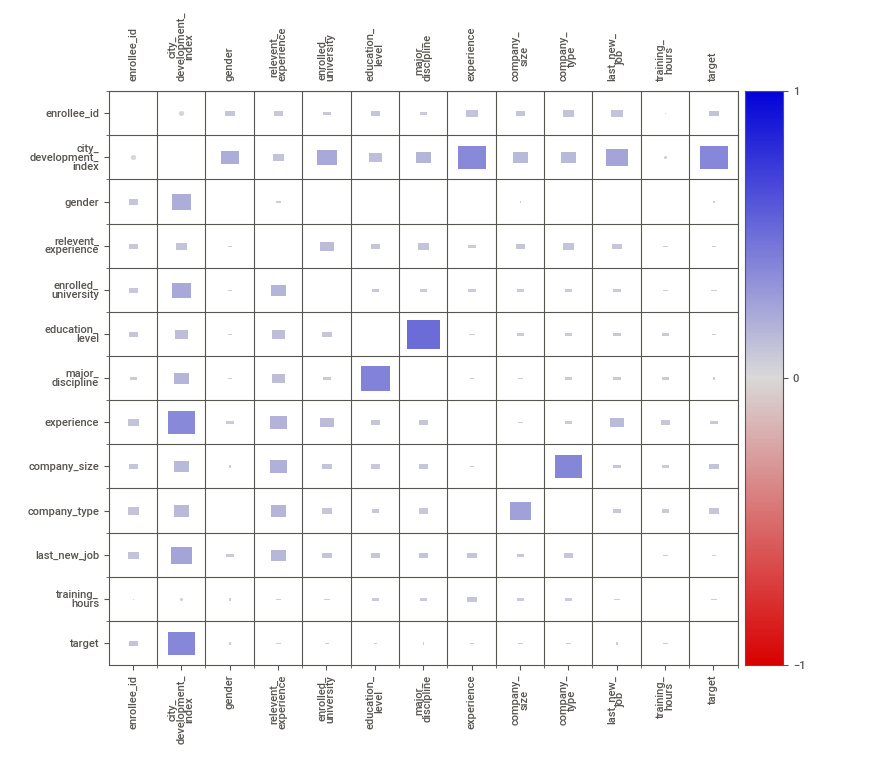
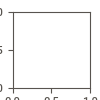

In [12]:
train_report.show_notebook()


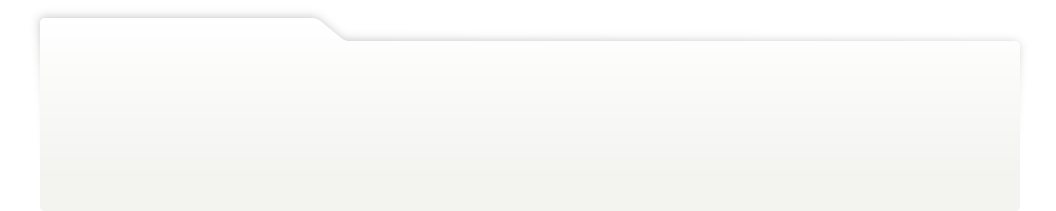
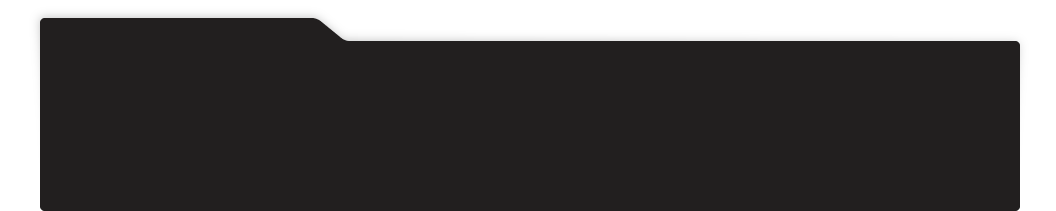
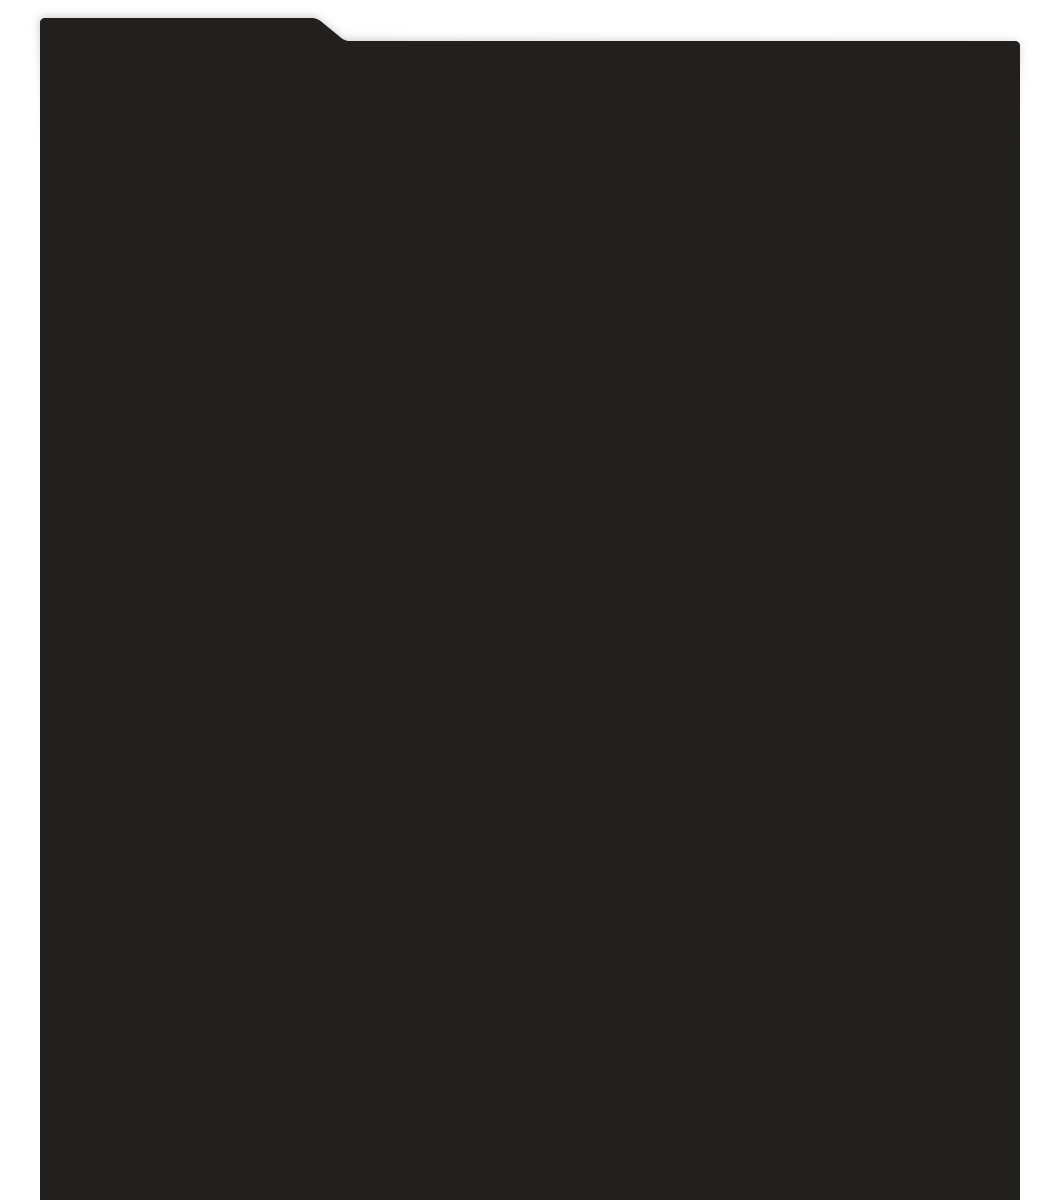
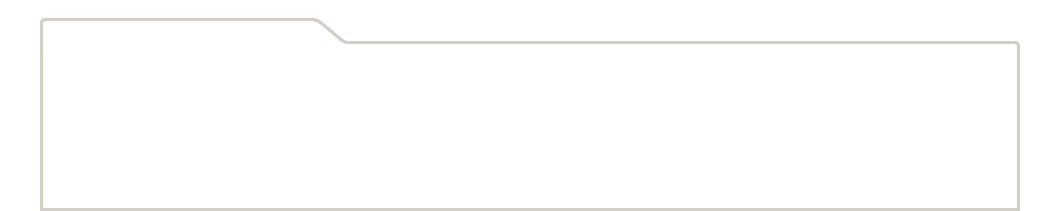
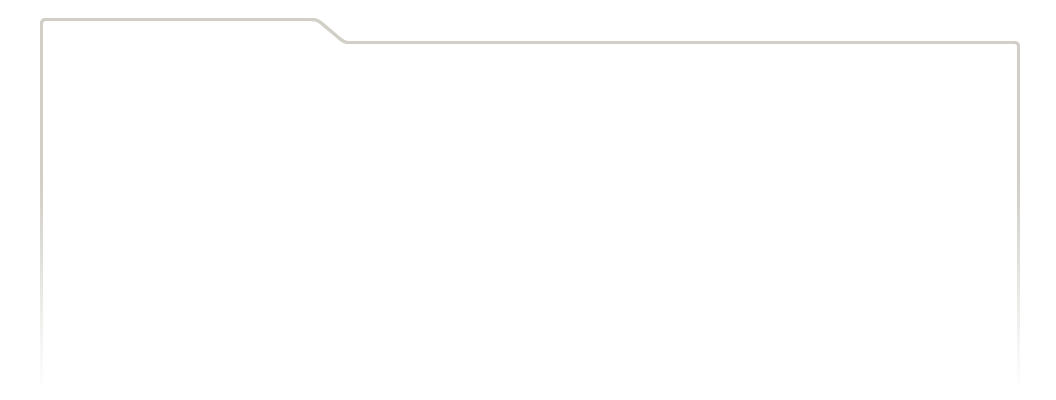
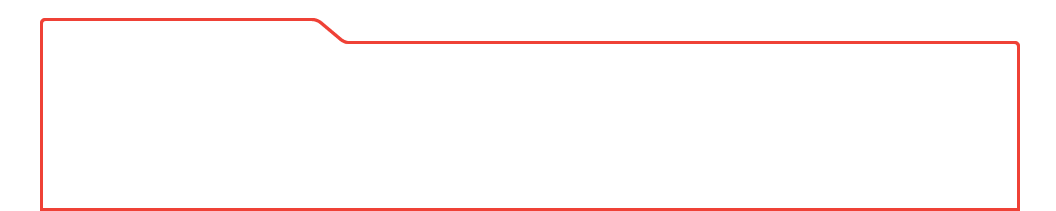
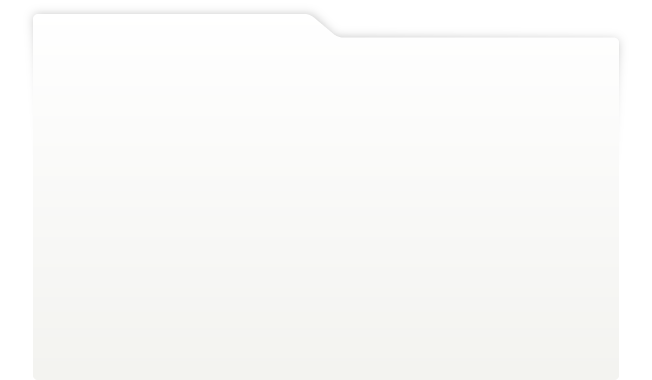
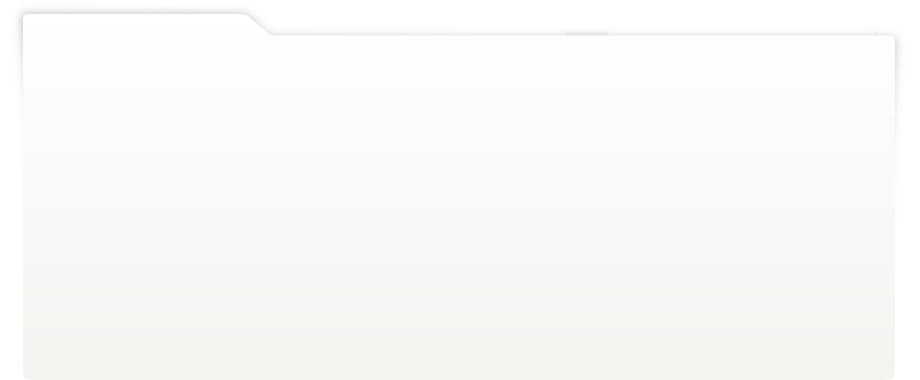
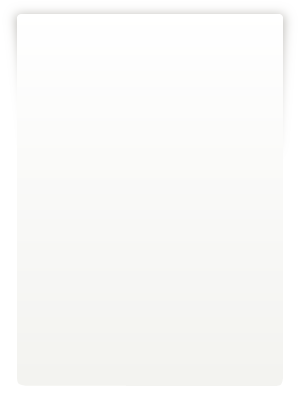
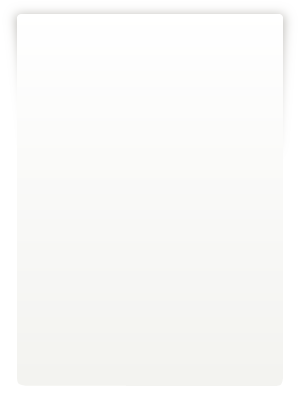
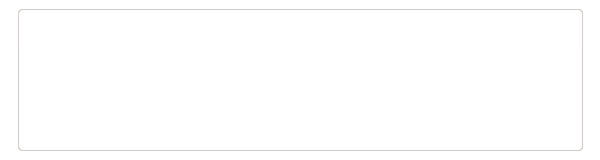
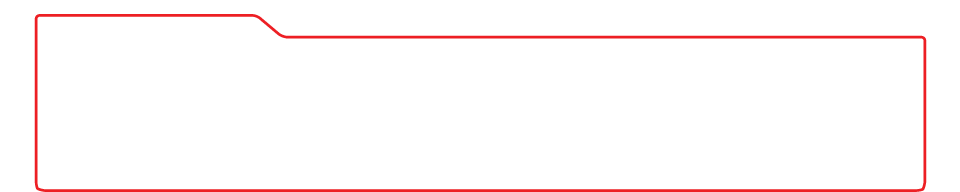
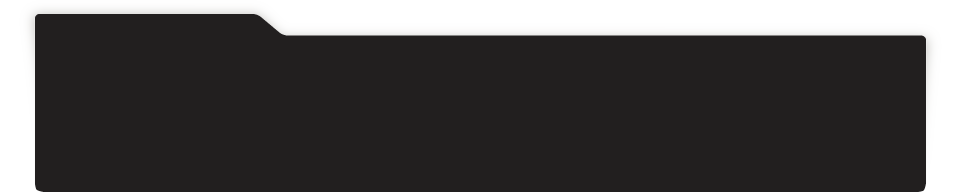
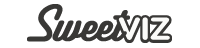
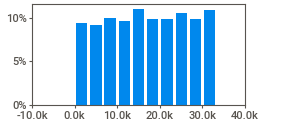
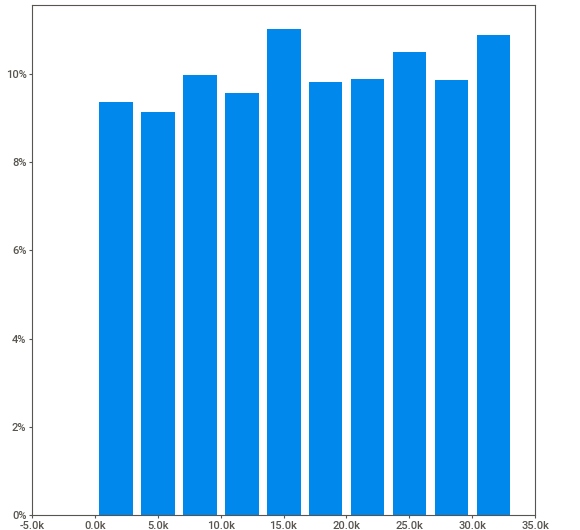
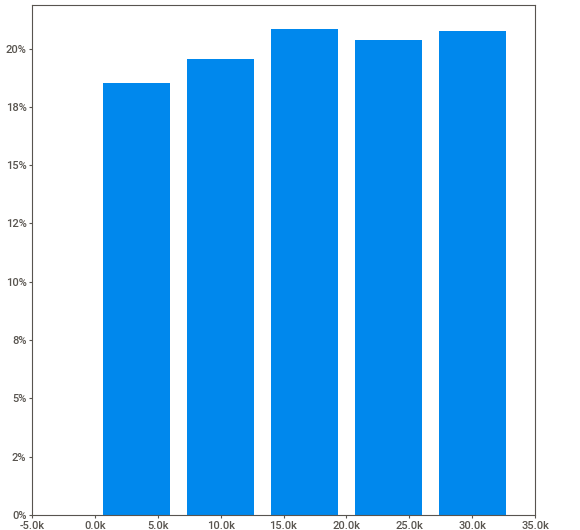
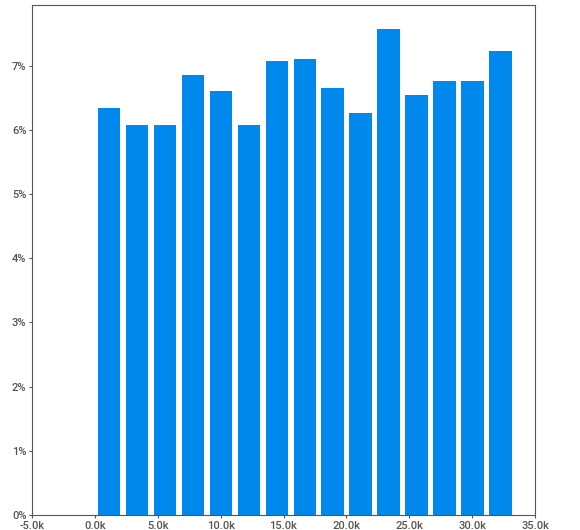
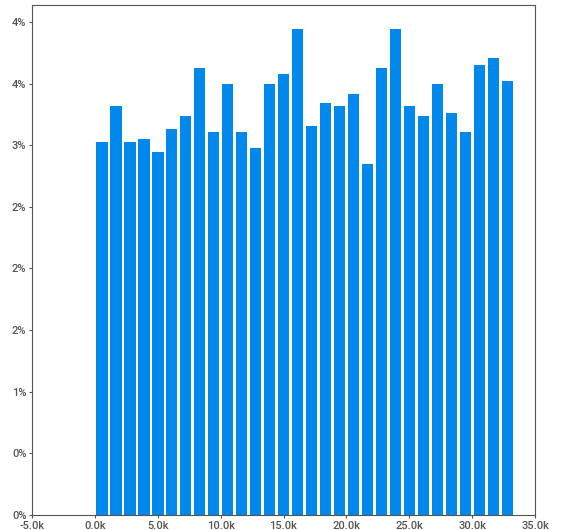
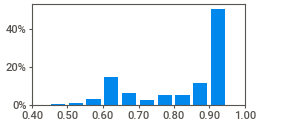
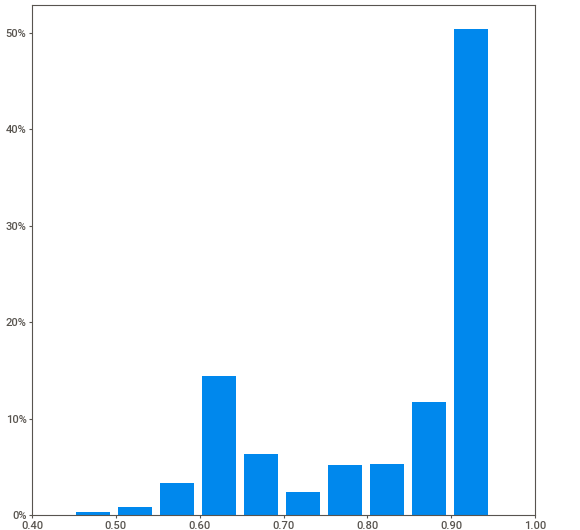
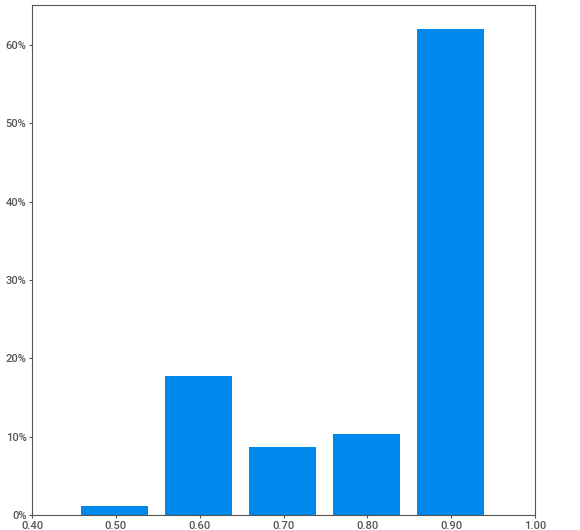
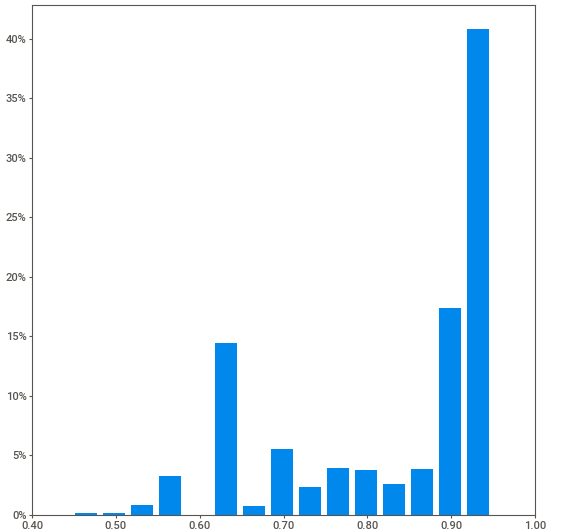
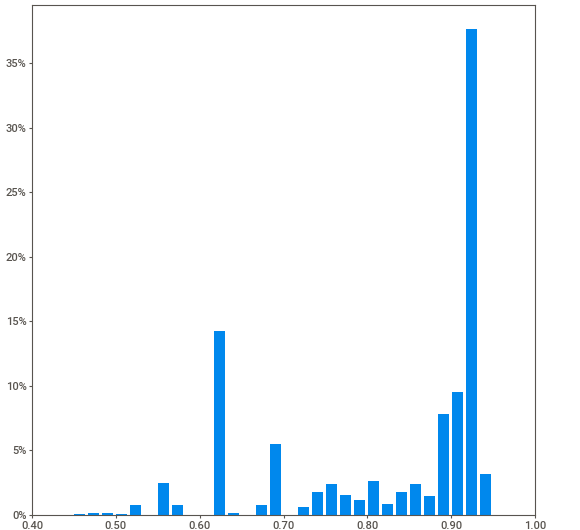
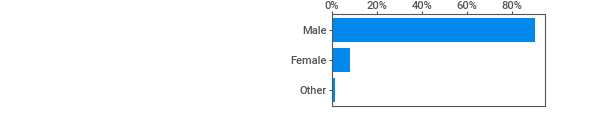
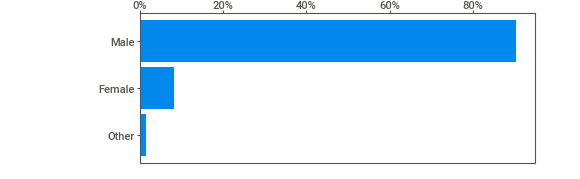
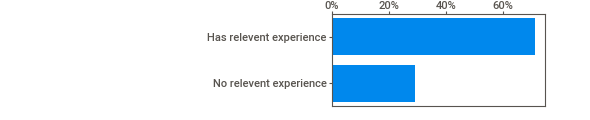
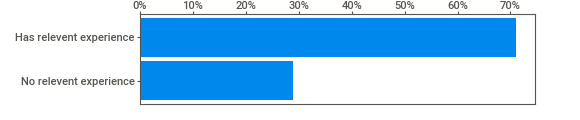
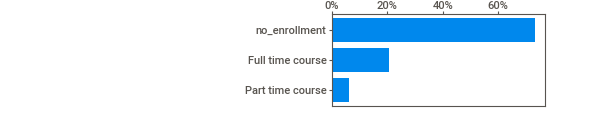
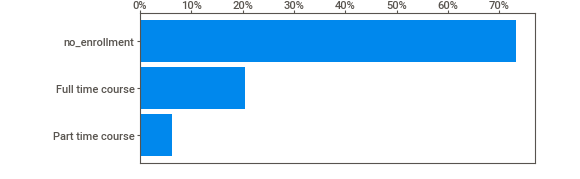
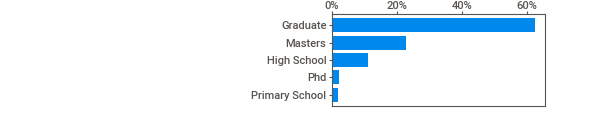
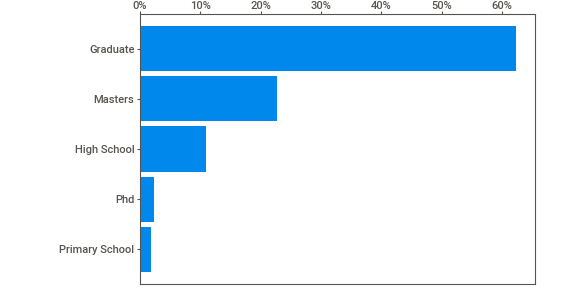
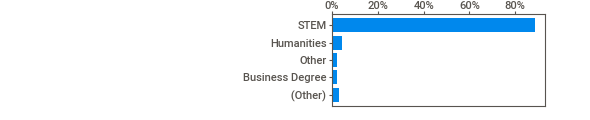
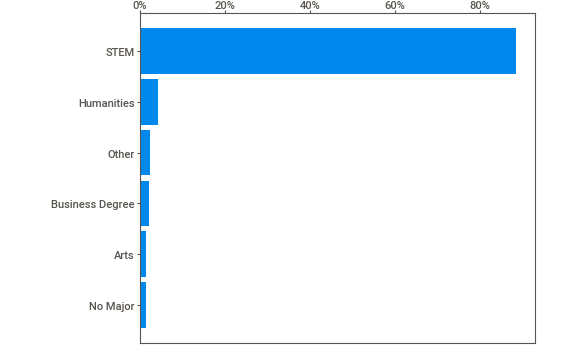
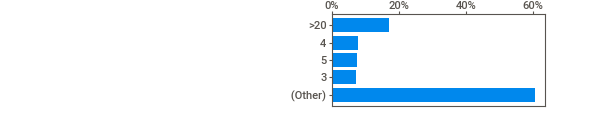
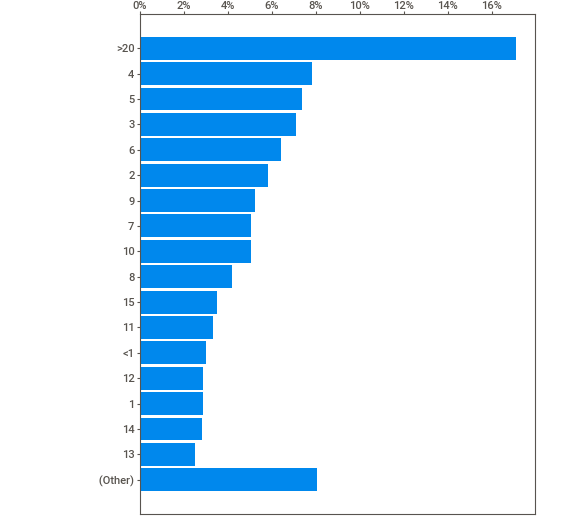
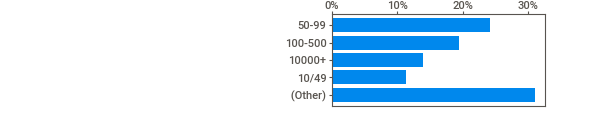
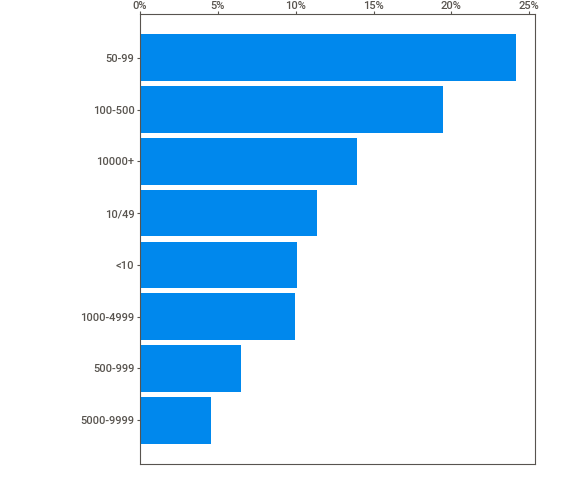
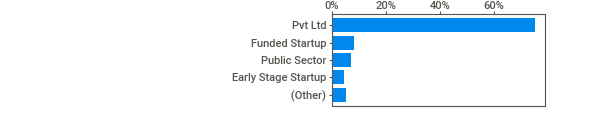
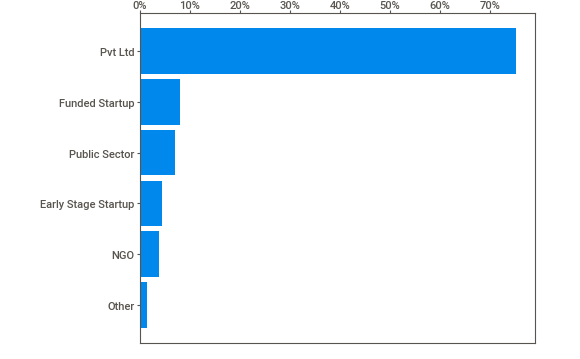
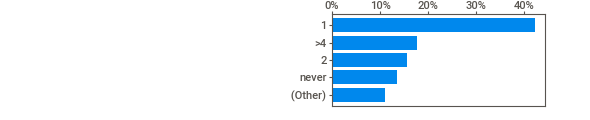
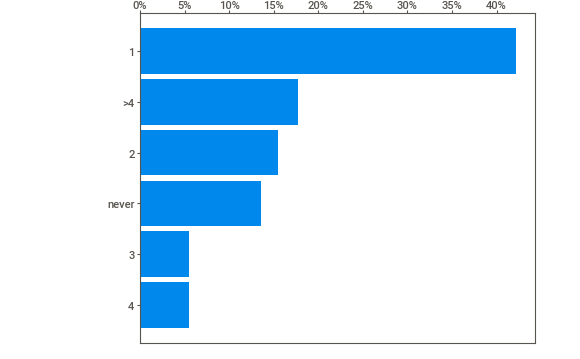
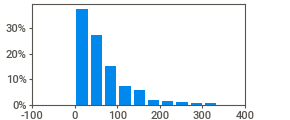
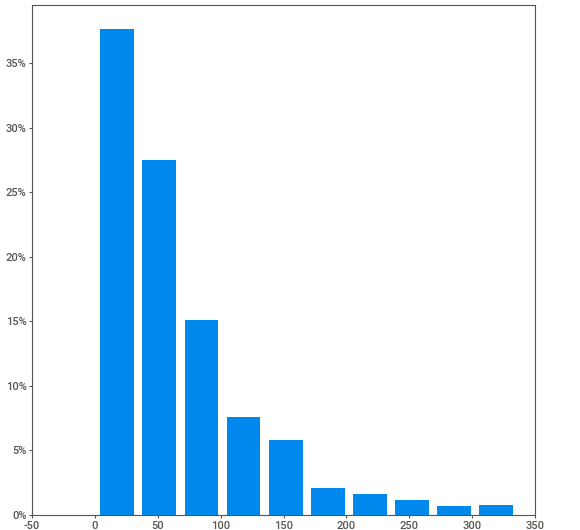
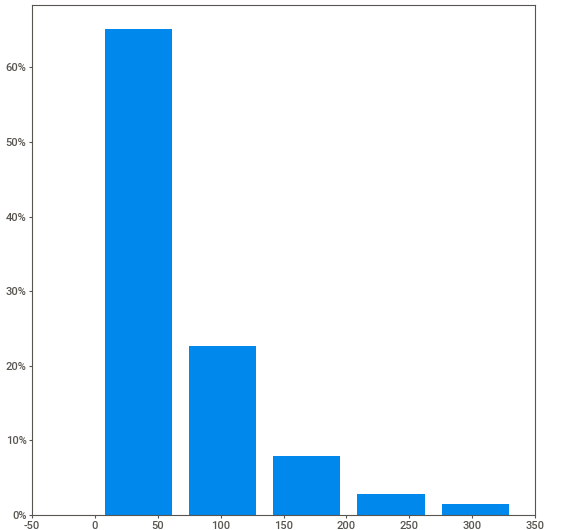
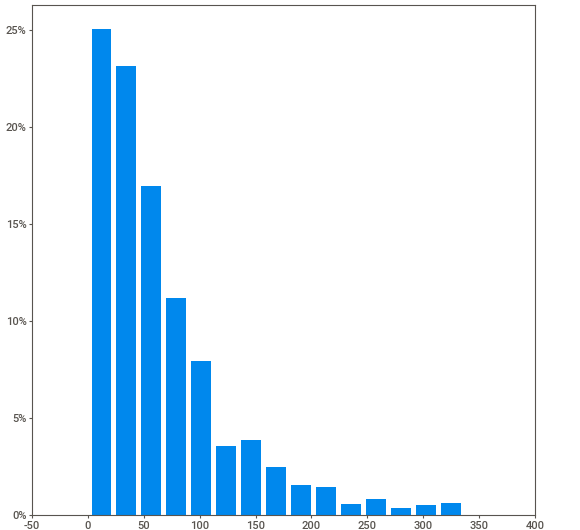
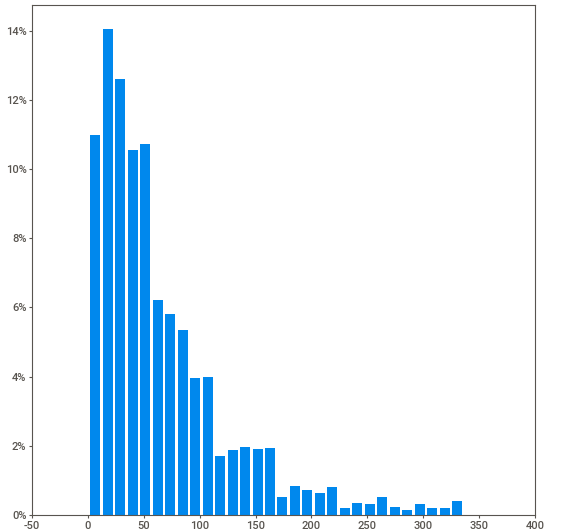
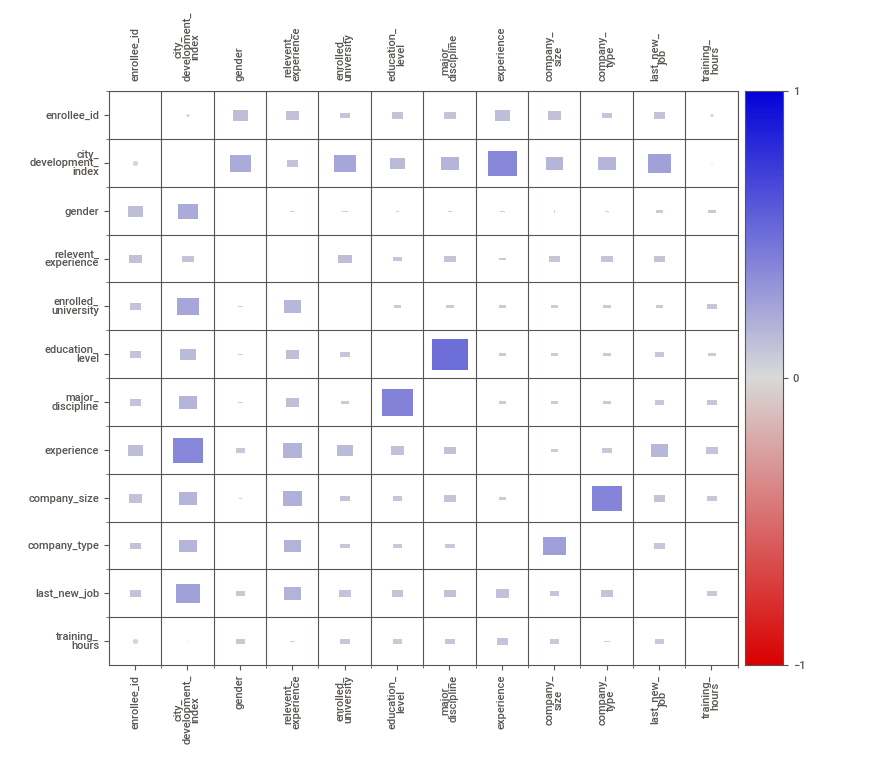
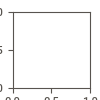

In [13]:
test_report.show_notebook()

In [15]:
df_z_train.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.042412,0.008480,0.047564
city_development_index,-0.042412,1.000000,-0.000534,-0.346320
training_hours,0.008480,-0.000534,1.000000,-0.018939
target,0.047564,-0.346320,-0.018939,1.000000


In [34]:
df_z_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [54]:
str(df_z_train.enrolled_university[3])

'nan'

In [55]:
list_enrolled_university = []
for i in list(df_z_train.enrolled_university.astype(str)):
  if i == 'nan':
    list_enrolled_university.append(np.nan)
  elif i == 'no_enrollment':
    list_enrolled_university.append(0)
  else:
    list_enrolled_university.append(1)

In [56]:
list_enrolled_university[3]

nan

In [61]:
df_dummies= pd.get_dummies(df_z_train['relevent_experience'])

In [63]:
df_dummies['Has relevent experience']

0        1
1        0
2        0
3        0
4        1
        ..
15321    0
15322    1
15323    1
15324    1
15325    0
Name: Has relevent experience, Length: 15326, dtype: uint8

In [65]:
list_education_level = []
for i in list(df_z_train.education_level.astype(str)):
  if i == 'nan':
    list_education_level.append(np.nan)
  elif i == 'Primary School':
    list_education_level.append(1)
  elif i == 'High School':
    list_education_level.append(2)
  elif i == 'Graduate':
    list_education_level.append(3)
  elif i == 'Masters':
    list_education_level.append(4)
  else:
    list_education_level.append(5)

In [73]:
df_train_final = pd.DataFrame()

In [70]:
df_z_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [74]:
df_train_final['enrollee_id'] = df_z_train['enrollee_id']
df_train_final['city_development'] = df_z_train['city_development_index']
df_train_final['relevant_experience'] = df_dummies['Has relevent experience']
df_train_final['enrolled_university'] = list_enrolled_university
df_train_final['education_level'] = list_education_level
df_train_final['training_hours'] = df_z_train['training_hours']
df_train_final['target']= df_z_train['target']

In [75]:
df_train_final

,enrollee_id,city_development,relevant_experience,enrolled_university,education_level,training_hours,target
0,8949,0.920,1,0.0,3.0,36,1.0
1,29725,0.776,0,0.0,3.0,47,0.0
2,11561,0.624,0,1.0,3.0,83,0.0
3,33241,0.789,0,NaN,3.0,52,1.0
4,21651,0.764,1,1.0,3.0,24,1.0
...,...,...,...,...,...,...,...
15321,7386,0.878,0,0.0,3.0,42,1.0
15322,31398,0.920,1,0.0,3.0,52,1.0
15323,24576,0.920,1,0.0,3.0,44,0.0
15324,5756,0.802,1,0.0,2.0,97,0.0


In [33]:
from sklearn.pipeline import Pipeline

In [17]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

In [82]:
imp_imputer = IterativeImputer(initial_strategy ='most_frequent' ,random_state=12)

In [83]:
df_final_train_imputer = pd.DataFrame(imp_imputer.fit_transform(df_train_final), columns = df_train_final.columns)

In [84]:
df_final_train_imputer

,enrollee_id,city_development,relevant_experience,enrolled_university,education_level,training_hours,target
0,8949.0,0.920,1.0,0.000000,3.0,36.0,1.0
1,29725.0,0.776,0.0,0.000000,3.0,47.0,0.0
2,11561.0,0.624,0.0,1.000000,3.0,83.0,0.0
3,33241.0,0.789,0.0,0.571002,3.0,52.0,1.0
4,21651.0,0.764,1.0,1.000000,3.0,24.0,1.0
...,...,...,...,...,...,...,...
15321,7386.0,0.878,0.0,0.000000,3.0,42.0,1.0
15322,31398.0,0.920,1.0,0.000000,3.0,52.0,1.0
15323,24576.0,0.920,1.0,0.000000,3.0,44.0,0.0
15324,5756.0,0.802,1.0,0.000000,2.0,97.0,0.0


In [85]:
df_final_train_imputer.to_csv('/content/drive/MyDrive/Ironhack/Proyecto4/dapt-sept2022/final_train_imputer.csv',index= False)

In [86]:
list_enrolled_university = []
for i in list(df_z_test.enrolled_university.astype(str)):
  if i == 'nan':
    list_enrolled_university.append(np.nan)
  elif i == 'no_enrollment':
    list_enrolled_university.append(0)
  else:
    list_enrolled_university.append(1)
list_education_level = []
for i in list(df_z_test.education_level.astype(str)):
  if i == 'nan':
    list_education_level.append(np.nan)
  elif i == 'Primary School':
    list_education_level.append(1)
  elif i == 'High School':
    list_education_level.append(2)
  elif i == 'Graduate':
    list_education_level.append(3)
  elif i == 'Masters':
    list_education_level.append(4)
  else:
    list_education_level.append(5)
df_dummies_test= pd.get_dummies(df_z_test['relevent_experience'])
df_test_final = pd.DataFrame()
df_test_final['enrollee_id'] = df_z_test['enrollee_id']
df_test_final['city_development'] = df_z_test['city_development_index']
df_test_final['relevant_experience'] = df_dummies_test['Has relevent experience']
df_test_final['enrolled_university'] = list_enrolled_university
df_test_final['education_level'] = list_education_level
df_test_final['training_hours'] = df_z_test['training_hours']
df_final_test_imputer = pd.DataFrame(imp_imputer.fit_transform(df_test_final), columns = df_test_final.columns)

In [88]:
df_final_test_imputer.to_csv('/content/drive/MyDrive/Ironhack/Proyecto4/dapt-sept2022/final_test_imputer.csv',index= False)

In [91]:
df_final_test_imputer.columns

Index(['enrollee_id', 'city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours'],
      dtype='object')

In [94]:
df_final_train_imputer.columns

Index(['enrollee_id', 'city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours', 'target'],
      dtype='object')

In [89]:
from sklearn.isotonic import IsotonicRegression

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
linear_reg = LinearRegression().fit(df_final_train_imputer[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']], df_final_train_imputer.target)

In [100]:
linear_reg.predict(df_final_test_imputer[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])

array([0.24619391, 0.18235309, 0.46493653, ..., 0.1230147 , 0.1852802 ,
       0.1048881 ])

In [104]:
from sklearn import metrics

In [110]:
test_plot= metrics.roc_auc_score(df_final_train_imputer.target,linear_reg.predict(df_final_train_imputer[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']]))

In [111]:
test_plot

0.7175435971113628

In [133]:
prediction = pd.DataFrame()
prediction['enrollee_id'] = df_test_final['enrollee_id']
prediction['prediction'] = linear_reg.predict(df_final_test_imputer[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])

In [134]:
list_target = []
for i in prediction.prediction:
  if i <= 0.24:
    list_target.append(1)
  else:
    list_target.append(0)

In [135]:
prediction['target']=list_target

In [136]:
prediction.drop('prediction',axis=1, inplace = True)

In [137]:
prediction.to_csv('/content/drive/MyDrive/Ironhack/Proyecto4/dapt-sept2022/prediction_6.csv', index = False)

In [116]:
from sklearn.ensemble import AdaBoostRegressor

In [119]:
ada_boost_m = AdaBoostRegressor(random_state=0, n_estimators=100).fit(df_final_train_imputer[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']], df_final_train_imputer.target)

In [124]:
ada_boost_m.score(df_final_train_imputer[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']], df_final_train_imputer.target)

0.16609308401428724

In [121]:
p_ada_boost= ada_boost_m.predict(df_final_test_imputer[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])

In [ ]:
metrics.roc_auc_score(df_final_train_imputer.target,linear_reg.predict(df_final_train_imputer[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']]))